c:\Users\leona\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\leona\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
c:\Users\leona\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


24
24


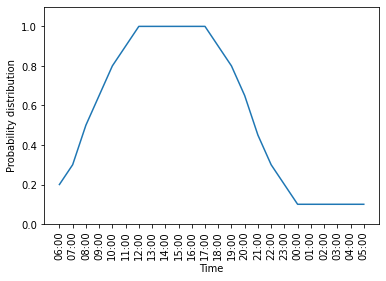

In [1]:
from model_lomba import *
import matplotlib.pyplot as plt
import seaborn as sns

demand = [0.2,0.3,0.5,0.65,0.8,0.9,1.0,1.0,1.0,1.0,1.0,1.0,0.9,0.8,0.65,0.45,0.3,0.2,0.1,0.1,0.1,0.1,0.1,0.1]
hour = ["06:00","07:00","08:00","09:00","10:00","11:00","12:00","13:00","14:00","15:00","16:00","17:00","18:00","19:00","20:00","21:00","22:00","23:00","00:00","01:00","02:00","03:00","04:00","05:00"]
print(len(demand))
print(len(hour))

plt.plot(hour,demand)
plt.xticks(rotation = 'vertical')
plt.xlabel('Time')
plt.ylabel('Probability distribution')
plt.title('')
plt.ylim([0.0,1.1])
#plt.tight_layout()
#plt.savefig('Prob-dist.png', format = 'png' )
plt.show()

Less : ratio (cp : inventory) 1:3 charging size = 6; inv size = 19 (40-45 seems like)  
Normal : ratio (cp : inventory) 1:3 charging size = 3; inv size = 9 (40-45 seems like)  
More : ratio (cp : inventory) 1:3 charging size = 2; inv size = 5 (40-45 seems like)

In [27]:
map_width = 50
map_height = 50
moore = False
num_of_motorist = 50
ratio = 3

#Dalam menit
days = 14
num_of_step = days*24*60
#num_of_step = 100
temp_ = 0
n = 16
while temp_ < 45 : 
    n += 1
    print('inventory',n)
    inv_size = n
    cp_size = int(np.ceil(inv_size/ratio))
    model = switching_model(num_of_motorist=50,num_of_stations=4,inv_size=inv_size,cp_size= cp_size,width=map_width,height=map_height,moore=moore, configuration="less", demand = demand)

    for i in range(num_of_step):
        model.step()
    model_data = model.datacollector.get_model_vars_dataframe()
    temp_ = model_data["num_of_alive"].iloc[-1]
    print(temp_)

n_ = 0
while temp_ > 45:
    n_ += 1
    print('inventory',n, ' pengurangan cp', n_)
    inv_size = n
    cp_size = int(np.ceil(inv_size/ratio)) - n_
    model = switching_model(num_of_motorist=50,num_of_stations=4,inv_size=inv_size,cp_size= cp_size,width=map_width,height=map_height,moore=moore, configuration="less", demand = demand)

    for i in range(num_of_step):
        model.step()
    model_data = model.datacollector.get_model_vars_dataframe()
    temp_ = model_data["num_of_alive"].iloc[-1]
    print(temp_)


inventory 17
4
4
38
inventory 18
4
4
42
inventory 19
4
4
48
inventory 19  pengurangan cp 1
4
4
48
inventory 19  pengurangan cp 2
4
4
38


In [29]:
map_width = 50
map_height = 50
moore = False
num_of_motorist = 50
ratio = 3

#Dalam menit
days = 14
num_of_step = days*24*60
#num_of_step = 100
temp_ = 0
n = 5
while temp_ < 45 : 
    n += 1
    print('inventory',n)
    inv_size = n
    cp_size = int(np.ceil(inv_size/ratio))
    model = switching_model(num_of_motorist=50,num_of_stations=4,inv_size=inv_size,cp_size= cp_size,width=map_width,height=map_height,moore=moore, configuration="normal", demand = demand)

    for i in range(num_of_step):
        model.step()
    model_data = model.datacollector.get_model_vars_dataframe()
    temp_ = model_data["num_of_alive"].iloc[-1]
    print(temp_)

n_ = 0
while temp_ > 45:
    n_ += 1
    print('inventory',n, ' pengurangan cp', n_)
    inv_size = n
    cp_size = int(np.ceil(inv_size/ratio)) - n_
    model = switching_model(num_of_motorist=50,num_of_stations=4,inv_size=inv_size,cp_size= cp_size,width=map_width,height=map_height,moore=moore, configuration="normal", demand = demand)

    for i in range(num_of_step):
        model.step()
    model_data = model.datacollector.get_model_vars_dataframe()
    temp_ = model_data["num_of_alive"].iloc[-1]
    print(temp_)


inventory 6
9
9
27
inventory 7
9
9
35
inventory 8
9
9
37
inventory 9
9
9
46
inventory 9  pengurangan cp 1
9
9
29


In [28]:
map_width = 50
map_height = 50
moore = False
num_of_motorist = 50
ratio = 3

#Dalam menit
days = 14
num_of_step = days*24*60
#num_of_step = 100
temp_ = 0
n = 4
while temp_ < 45 : 
    n += 1
    print('inventory',n)
    inv_size = n
    cp_size = int(np.ceil(inv_size/ratio))
    model = switching_model(num_of_motorist=50,num_of_stations=4,inv_size=inv_size,cp_size= cp_size,width=map_width,height=map_height,moore=moore, configuration="more", demand = demand)

    for i in range(num_of_step):
        model.step()
    model_data = model.datacollector.get_model_vars_dataframe()
    temp_ = model_data["num_of_alive"].iloc[-1]
    print(temp_)

n_ = 0
while temp_ > 45:
    n_ += 1
    print('inventory',n, ' pengurangan cp', n_)
    inv_size = n
    cp_size = int(np.ceil(inv_size/ratio)) - n_
    model = switching_model(num_of_motorist=50,num_of_stations=4,inv_size=inv_size,cp_size= cp_size,width=map_width,height=map_height,moore=moore, configuration="more", demand = demand)

    for i in range(num_of_step):
        model.step()
    model_data = model.datacollector.get_model_vars_dataframe()
    temp_ = model_data["num_of_alive"].iloc[-1]
    print(temp_)


inventory 5
16
16
46
inventory 5  pengurangan cp 1
16
16
23


In [22]:
n_ = 0
while temp_ > 45:
    n_ += 1
    print('perkalian ratio',n, ' pengurangan cp', n_)
    inv_size = ratio*n
    cp_size = int(np.ceil(inv_size/ratio)) - n_
    model = switching_model(num_of_motorist=50,num_of_stations=4,inv_size=inv_size,cp_size= cp_size,width=map_width,height=map_height,moore=moore, configuration="more", demand = demand)

    for i in range(num_of_step):
        model.step()
    model_data = model.datacollector.get_model_vars_dataframe()
    temp_ = model_data["num_of_alive"].iloc[-1]
    print(temp_)

perkalian ratio 2  pengurangan cp 1
16
16
30


In [37]:
map_width = 50
map_height = 50
moore = False
num_of_motorist = 50
inv_size = 19
cp_size = 6
model = switching_model(num_of_motorist=50,num_of_stations=10,inv_size=inv_size,cp_size= cp_size,width=map_width,height=map_height,moore=moore, configuration="less", demand = demand)

#Dalam menit
days = 14
num_of_step = days*24*60
#num_of_step = 100
for i in range(num_of_step):
    model.step()

4
4


In [38]:
#Ambil data agent
agent_data = model.datacollector.get_agent_vars_dataframe()
agent_data.head()

Position       Charge Alive  Full_battery  Empty_battery  \
Step AgentID                                                            
0    0           None  1441.394150  None           NaN            NaN   
     1           None  2518.010848  None           NaN            NaN   
     2           None  1301.875509  None           NaN            NaN   
     3           None  1531.932038  None           NaN            NaN   
     4           None  2533.630676  None           NaN            NaN   

              CP_full  CP_empty  
Step AgentID                     
0    0            NaN       NaN  
     1            NaN       NaN  
     2            NaN       NaN  
     3            NaN       NaN  
     4            NaN       NaN

In [39]:
motorist_alive = agent_data.xs(num_of_step-1,level = "Step")["Alive"]
motorist_id = []
for motor in model.motorists:
    motorist_id.append(motor.unique_id)
motorist_alive[motorist_id]

AgentID
150     True
151     True
152     True
153     True
154     True
155     True
156     True
157     True
158     True
159     True
160     True
161     True
162     True
163     True
164     True
165     True
166     True
167    False
168    False
169     True
170     True
171    False
172     True
173     True
174    False
175     True
176     True
177    False
178     True
179    False
180    False
181     True
182    False
183     True
184     True
185     True
186     True
187    False
188    False
189     True
190     True
191     True
192     True
193    False
194     True
195     True
196     True
197    False
198     True
199     True
Name: Alive, dtype: object

In [40]:
agent_pos = agent_data.xs(0,level = "Step")["Position"]
station_id = []
for stat in model.stations:
    station_id.append(stat.unique_id)
station_pos = agent_pos[station_id]
print(station_pos)

AgentID
200    (11, 11)
201    (11, 36)
202    (36, 11)
203    (36, 36)
Name: Position, dtype: object


In [41]:
step_station = num_of_step-1
#step_station = 0
agent_full = agent_data.xs(step_station,level = "Step")["Full_battery"]
station_id = []
for stat in model.stations:
    station_id.append(stat.unique_id)
station_full = agent_full[station_id]
print(station_full)

AgentID
200    19.0
201    19.0
202    19.0
203    19.0
Name: Full_battery, dtype: float64


In [42]:
agent_empty = agent_data.xs(step_station,level = "Step")["Empty_battery"]
station_id = []
for stat in model.stations:
    station_id.append(stat.unique_id)
station_empty = agent_empty[station_id]
print(station_empty)

AgentID
200    0.0
201    0.0
202    0.0
203    0.0
Name: Empty_battery, dtype: float64


In [43]:
agent_cp_full = agent_data.xs(step_station,level = "Step")["CP_full"]
station_id = []
for stat in model.stations:
    station_id.append(stat.unique_id)
station_cp_full = agent_cp_full[station_id]
print(station_cp_full)

AgentID
200    6.0
201    4.0
202    6.0
203    5.0
Name: CP_full, dtype: float64


In [44]:
agent_cp_empty = agent_data.xs(step_station,level = "Step")["CP_empty"]
station_id = []
for stat in model.stations:
    station_id.append(stat.unique_id)
station_cp_empty = agent_cp_empty[station_id]
print(station_cp_empty)

AgentID
200    0.0
201    2.0
202    0.0
203    1.0
Name: CP_empty, dtype: float64


In [45]:
#Ambil data motorist
driver_num = 0
motorist_pos = agent_data.xs(model.motorists[driver_num].unique_id, level = "AgentID")["Position"]
motorist_pos.head()
motorist_pos.tail()

Step
20155    (19, 29)
20156    (19, 29)
20157    (19, 29)
20158    (19, 29)
20159    (19, 29)
Name: Position, dtype: object

Text(0, 0.5, 'y')

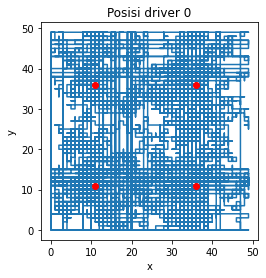

In [46]:
#Coba plot posisi
x_coor = []
y_coor = []
for coor in motorist_pos:
    x_coor.append(coor[0])
    y_coor.append(coor[1])



plt.plot(x_coor,y_coor)
for i in range(model.num_of_stations):
    plt.plot(model.stations[i].pos[0],model.stations[i].pos[1],color = "red", marker = 'o')
plt.xlim([0,map_width])
plt.ylim([0,map_height])
plt.title('Posisi driver ' + str(driver_num))
plt.axis('scaled')
plt.xlabel('x')
plt.ylabel('y')

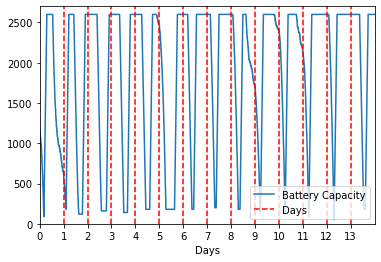

In [47]:
#Cek baterai
battery_id = 8
battery_energy = agent_data.xs(battery_id, level = "AgentID")["Charge"]
battery_energy.plot()
plt.xlim(0,num_of_step)
plt.ylim(0,2700)
for i in range(1,days):
    plt.axvline(x = 1440*i, color = 'r', linestyle='--', label = 'axvline - full height')
plt.legend(['Battery Capacity','Days'])
locs, labels = plt.xticks()  # Get the current locations and labels.
plt.xticks(np.arange(0, days*1440, step=1440))  # Set label locations.
plt.xticks(np.arange(days)*1440, np.arange(0,days))  # Set text labels.
#plt.xticks([0, 1, 2], ['January', 'February', 'March'],
#       rotation=20)  # Set text labels and properties.
plt.xlabel('Days')
#plt.title('Example of Battery Charge Cycle')
plt.show()

In [48]:
model_data = model.datacollector.get_model_vars_dataframe()
model_data.tail()

,num_of_alive,num_of_charging
20155,38,3
20156,38,3
20157,38,3
20158,38,3
20159,38,3


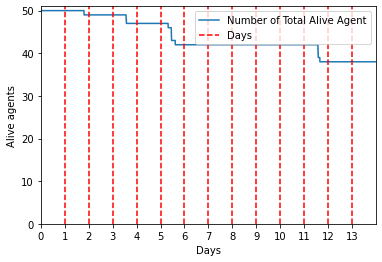

In [49]:
plt.plot(model_data["num_of_alive"])
plt.ylim([0,num_of_motorist + 1])
plt.ylabel("Alive agents")
plt.xlabel("Steps")
plt.xlim(0,num_of_step)
for i in range(1,days):
    plt.axvline(x = 1440*i, color = 'r', linestyle='--', label = 'axvline - full height')
plt.legend(['Number of Total Alive Agent','Days'])
locs, labels = plt.xticks()  # Get the current locations and labels.
plt.xticks(np.arange(0, days*1440, step=1440))  # Set label locations.
plt.xticks(np.arange(days)*1440, np.arange(0,days))  # Set text labels.
#plt.xticks([0, 1, 2], ['January', 'February', 'March'],
#       rotation=20)  # Set text labels and properties.
plt.xlabel('Days')
#plt.title('Number of Total Alive Agent')
plt.show()

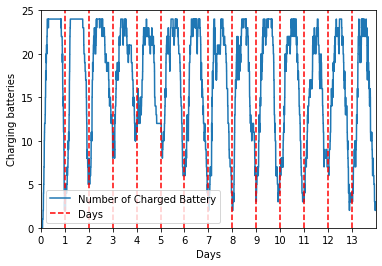

In [50]:
plt.plot(model_data["num_of_charging"])
plt.ylim([0,model.num_of_stations*model.cp_size +1])
plt.ylabel("Charging batteries")
plt.xlabel("Steps")
plt.xlim(0,num_of_step)
for i in range(1,days):
    plt.axvline(x = 1440*i, color = 'r', linestyle='--', label = 'axvline - full height')
plt.legend(['Number of Charged Battery','Days'])
locs, labels = plt.xticks()  # Get the current locations and labels.
plt.xticks(np.arange(0, days*1440, step=1440))  # Set label locations.
plt.xticks(np.arange(days)*1440, np.arange(0,days))  # Set text labels.
#plt.xticks([0, 1, 2], ['January', 'February', 'March'],
#       rotation=20)  # Set text labels and properties.
plt.xlabel('Days')
#plt.title('Number of Total Alive Agent')
plt.show()

In [ ]:
#dapetin semua motor
motorist_id = []
for mot in model.motorists:
    motorist_id.append(mot.unique_id)

#ID motor pertama dan terakhir
first_motor = min(motorist_id)
last_motor = max(motorist_id)

#Ambil data motor doang
motorist_data = agent_data.loc[(agent_data.index.get_level_values('AgentID')>=first_motor) & (agent_data.index.get_level_values('AgentID') <=last_motor)]


motorist_alive_position = motorist_data.loc[motorist_data['Alive'] == True]["Position"]
motorist_alive_position.tail()

#print jumlah baris
print(len(motorist_alive_position.index))

440954


In [ ]:
array_alive_positions = motorist_alive_position.tolist()
print(len(array_alive_positions))

440954


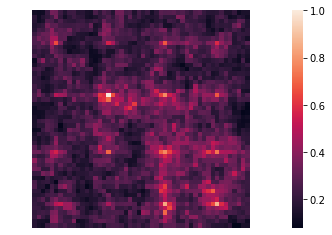

In [ ]:
heatmap_data = np.zeros((model.grid.width, model.grid.height))
for coor in array_alive_positions:
    x,y = coor
    heatmap_data[x,y] +=1

most_frequent = np.amax(heatmap_data)
norm_heatmap_data = heatmap_data/most_frequent

ax = sns.heatmap(norm_heatmap_data)
ax.invert_yaxis()
plt.axis('equal')
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
plt.tick_params(left = False, bottom = False)
#ax.set_xlabel('x')
#ax.set_ylabel('y')   

# Heat_map

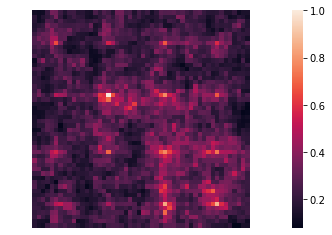

In [ ]:
heatmap_data = np.zeros((model.grid.width, model.grid.height))
for coor in array_alive_positions:
    x,y = coor
    heatmap_data[x,y] +=1

most_frequent = np.amax(heatmap_data)
norm_heatmap_data = heatmap_data/most_frequent

ax = sns.heatmap(norm_heatmap_data)
ax.invert_yaxis()
plt.axis('equal')
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
plt.tick_params(left = False, bottom = False)
#ax.set_xlabel('x')
#ax.set_ylabel('y')   

# Boxplot

In [ ]:
sengaja-error

In [51]:
map_width = 50
map_height = 50
moore = False
num_of_motorist = 50
ratio = 3 
inv_size = [19, 9 , 5]
cp_size = [6 , 3, 2]
config_ = ['less','normal','more']
days = 14
num_of_step = days*24*60
#num_of_step = 100
df_ = {
    'moore' : [],
    'num_alive' : [[],[],[]]
}

for i in range(len(config_)):
    df_['moore'].append(config_[i])
    for j in range(10):
        model = switching_model(num_of_motorist=50,num_of_stations=10,
        inv_size=inv_size[i],
        cp_size= cp_size[i],
        width=map_width,height=map_height,moore=moore, configuration=config_[i], demand = demand)

        for k in range(num_of_step):
            model.step()
            
        model_data = model.datacollector.get_model_vars_dataframe()
        df_['num_alive'][i].append(model_data["num_of_alive"].iloc[-1])

4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16


In [52]:
import pandas as pd 
box_ = pd.DataFrame(columns = config_)
for i in range(len(config_)):
    box_[config_[i]] = df_['num_alive'][i]

<AxesSubplot:>

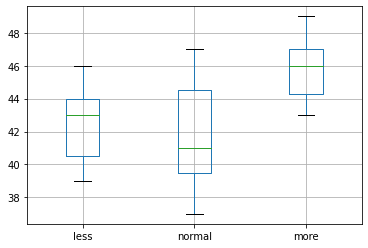

In [53]:
box_.boxplot()

In [54]:
map_width = 50
map_height = 50
moore = False
num_of_motorist = 50
ratio = 3 
inv_size = [19, 9 , 5]
cp_size = [6 , 3, 2]
config_ = [4,9,16]
days = 14
num_of_step = days*24*60
#num_of_step = 100
df_ = {
    'moore' : [],
    'num_alive' : [[],[],[]]
}

for i in range(len(config_)):
    df_['moore'].append(config_[i])
    for j in range(10):
        model = switching_model(num_of_motorist=50,num_of_stations=config_[i],
        inv_size=inv_size[i],
        cp_size= cp_size[i],
        width=map_width,height=map_height,moore=moore, configuration="random", demand = demand)

        for k in range(num_of_step):
            model.step()
            
        model_data = model.datacollector.get_model_vars_dataframe()
        df_['num_alive'][i].append(model_data["num_of_alive"].iloc[-1])

4
4
4
4
4
4
4
4
4
4
9
9
9
9
9
9
9
9
9
9
16
16
16
16
16
16
16
16
16
16


In [55]:
box_r = pd.DataFrame(columns = config_)
for i in range(len(config_)):
    box_r[config_[i]] = df_['num_alive'][i]

<AxesSubplot:>

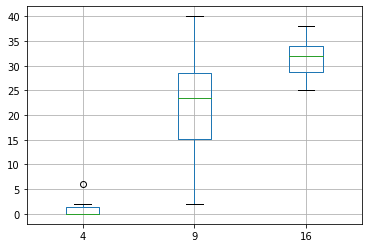

In [56]:
box_r.boxplot()

<AxesSubplot:>

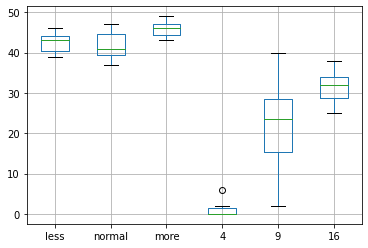

In [57]:
all_b = pd.concat([box_, box_r], axis=1)
all_b.boxplot()

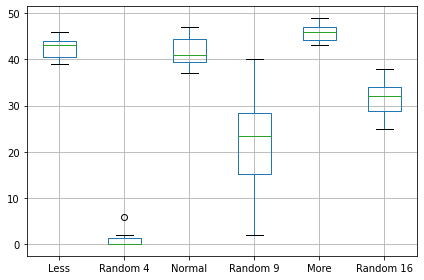

In [60]:
all_ = pd.DataFrame(columns = ['Less', 'Random 4', 'Normal', 'Random 9','More', 'Random 16'])
all_['Less'] = box_['less']
all_['Normal'] = box_['normal']
all_['More'] = box_['more']
all_['Random 4'] = box_r[4]
all_['Random 9'] = box_r[9]
all_['Random 16'] = box_r[16]
all_.boxplot()
plt.tight_layout()
plt.savefig('box-plot.png', format = 'png' )

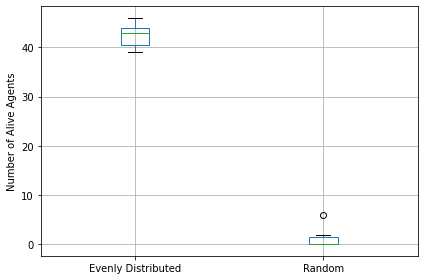

In [85]:
all_[['Less', 'Random 4']].boxplot()
plt.xticks([1, 2],['Evenly Distributed', 'Random'])
plt.ylabel('Number of Alive Agents')
plt.tight_layout()
plt.savefig('box-plot L4.png', format = 'png' )

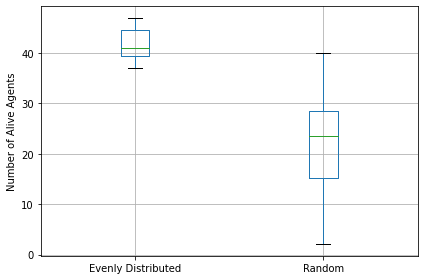

In [84]:
all_[['Normal', 'Random 9']].boxplot()
plt.xticks([1, 2],['Evenly Distributed', 'Random'])
plt.ylabel('Number of Alive Agents')
plt.tight_layout()
plt.savefig('box-plot N9.png', format = 'png' )

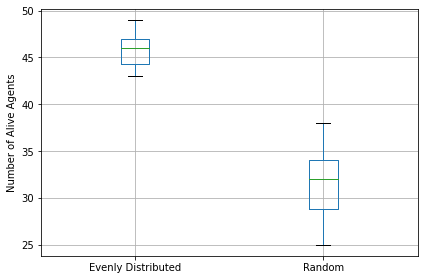

In [83]:
all_[['More', 'Random 16']].boxplot()
plt.xticks([1, 2],['Evenly Distributed', 'Random'])
plt.ylabel('Number of Alive Agents')
plt.tight_layout()
plt.savefig('box-plot M16.png', format = 'png' )

In [ ]:
plt.tight_layout()
plt.savefig('box-plot 4916.png', format = 'png' )

No inventory  
Less 17   
Normal 9  
More 5

In [61]:
map_width = 50
map_height = 50
moore = False
num_of_motorist = 50
ratio = 3

#Dalam menit
days = 14
num_of_step = days*24*60
#num_of_step = 100
temp_ = 0
n = 0
while temp_ < 45 : 
    n += 1
    print('charging',n)
    inv_size = 0
    cp_size = n
    model = switching_model(num_of_motorist=50,num_of_stations=4,inv_size=inv_size,cp_size= cp_size,width=map_width,height=map_height,moore=moore, configuration="less", demand = demand)

    for i in range(num_of_step):
        model.step()
    model_data = model.datacollector.get_model_vars_dataframe()
    temp_ = model_data["num_of_alive"].iloc[-1]
    print(temp_)

charging 1
4
4
1
charging 2
4
4
2
charging 3
4
4
3
charging 4
4
4
7
charging 5
4
4
10
charging 6
4
4
12
charging 7
4
4
16
charging 8
4
4
19
charging 9
4
4
19
charging 10
4
4
27
charging 11
4
4
33
charging 12
4
4
34
charging 13
4
4
33
charging 14
4
4
42
charging 15
4
4
44
charging 16
4
4
44
charging 17
4
4
48


In [62]:
map_width = 50
map_height = 50
moore = False
num_of_motorist = 50
ratio = 3

#Dalam menit
days = 14
num_of_step = days*24*60
#num_of_step = 100
temp_ = 0
n = 0
while temp_ < 45 : 
    n += 1
    print('charging',n)
    inv_size = 0
    cp_size = n
    model = switching_model(num_of_motorist=50,num_of_stations=4,inv_size=inv_size,cp_size= cp_size,width=map_width,height=map_height,moore=moore, configuration="normal", demand = demand)

    for i in range(num_of_step):
        model.step()
    model_data = model.datacollector.get_model_vars_dataframe()
    temp_ = model_data["num_of_alive"].iloc[-1]
    print(temp_)

charging 1
9
9
2
charging 2
9
9
6
charging 3
9
9
11
charging 4
9
9
17
charging 5
9
9
27
charging 6
9
9
30
charging 7
9
9
37
charging 8
9
9
42
charging 9
9
9
47


In [63]:
map_width = 50
map_height = 50
moore = False
num_of_motorist = 50
ratio = 3

#Dalam menit
days = 14
num_of_step = days*24*60
#num_of_step = 100
temp_ = 0
n = 0
while temp_ < 45 : 
    n += 1
    print('charging',n)
    inv_size = 0
    cp_size = n
    model = switching_model(num_of_motorist=50,num_of_stations=4,inv_size=inv_size,cp_size= cp_size,width=map_width,height=map_height,moore=moore, configuration="more", demand = demand)

    for i in range(num_of_step):
        model.step()
    model_data = model.datacollector.get_model_vars_dataframe()
    temp_ = model_data["num_of_alive"].iloc[-1]
    print(temp_)

charging 1
16
16
3
charging 2
16
16
11
charging 3
16
16
23
charging 4
16
16
36
charging 5
16
16
47


In [67]:
map_width = 50
map_height = 50
moore = False
num_of_motorist = 50
ratio = 3 
cp_size = [17 , 9, 5]
config_ = ['less','normal','more']
days = 14
num_of_step = days*24*60
#num_of_step = 100
df_ = {
    'moore' : [],
    'num_alive' : [[],[],[]]
}

for i in range(len(config_)):
    df_['moore'].append(config_[i])
    for j in range(10):
        model = switching_model(num_of_motorist=50,num_of_stations=10,
        inv_size=0,
        cp_size= cp_size[i],
        width=map_width,height=map_height,moore=moore, configuration=config_[i], demand = demand)

        for k in range(num_of_step):
            model.step()
            
        model_data = model.datacollector.get_model_vars_dataframe()
        df_['num_alive'][i].append(model_data["num_of_alive"].iloc[-1])

4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16


In [76]:
bbox_ = pd.DataFrame(columns = config_)
for i in range(len(config_)):
    bbox_[config_[i]] = df_['num_alive'][i]

In [77]:
map_width = 50
map_height = 50
moore = False
num_of_motorist = 50
cp_size = [17 , 9, 5]
config_ = [4,9,16]
days = 14
num_of_step = days*24*60
#num_of_step = 100
df_ = {
    'moore' : [],
    'num_alive' : [[],[],[]]
}

for i in range(len(config_)):
    df_['moore'].append(config_[i])
    for j in range(10):
        model = switching_model(num_of_motorist=50,num_of_stations=config_[i],
        inv_size=0,
        cp_size= cp_size[i],
        width=map_width,height=map_height,moore=moore, configuration="random", demand = demand)

        for k in range(num_of_step):
            model.step()
            
        model_data = model.datacollector.get_model_vars_dataframe()
        df_['num_alive'][i].append(model_data["num_of_alive"].iloc[-1])

4
4
4
4
4
4
4
4
4
4
9
9
9
9
9
9
9
9
9
9
16
16
16
16
16
16
16
16
16
16


In [78]:
bbox_r = pd.DataFrame(columns = config_)
for i in range(len(config_)):
    bbox_r[config_[i]] = df_['num_alive'][i]

<AxesSubplot:>

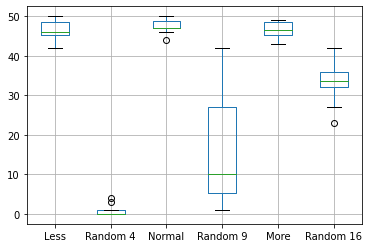

In [79]:
ball_ = pd.DataFrame(columns = ['Less', 'Random 4', 'Normal', 'Random 9','More', 'Random 16'])
ball_['Less'] = bbox_['less']
ball_['Normal'] = bbox_['normal']
ball_['More'] = bbox_['more']
ball_['Random 4'] = bbox_r[4]
ball_['Random 9'] = bbox_r[9]
ball_['Random 16'] = bbox_r[16]
ball_.boxplot()

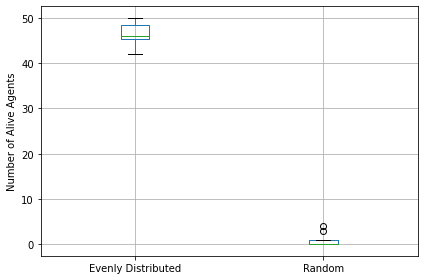

In [80]:
ball_[['Less', 'Random 4']].boxplot()
plt.xticks([1, 2],['Evenly Distributed', 'Random'])
plt.ylabel('Number of Alive Agents')
plt.tight_layout()
plt.savefig('bbox-plot L4.png', format = 'png' )

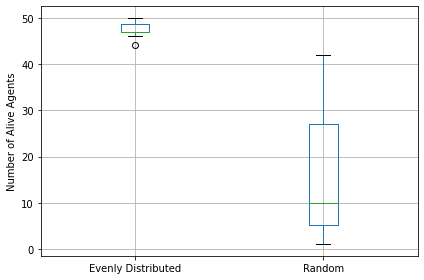

In [81]:
ball_[['Normal', 'Random 9']].boxplot()
plt.xticks([1, 2],['Evenly Distributed', 'Random'])
plt.ylabel('Number of Alive Agents')
plt.tight_layout()
plt.savefig('bbox-plot N9.png', format = 'png' )

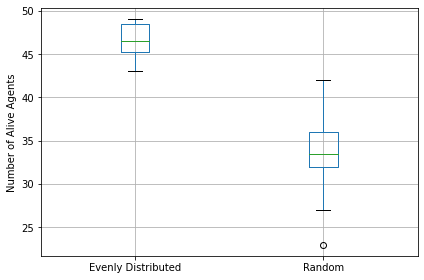

In [82]:
ball_[['More', 'Random 16']].boxplot()
plt.xticks([1, 2],['Evenly Distributed', 'Random'])
plt.ylabel('Number of Alive Agents')
plt.tight_layout()
plt.savefig('bbox-plot M16.png', format = 'png' )

<AxesSubplot:>

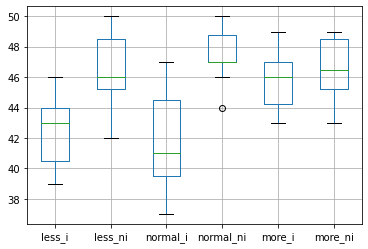

In [87]:
invvv_ = pd.DataFrame(columns = ['less_i', 'less_ni', 'normal_i', 'normal_ni','more_i', 'more_ni'])
invvv_['less_i'] = box_['less']
invvv_['less_ni'] =bbox_['less']
invvv_['normal_i'] = box_['normal']
invvv_['normal_ni'] =  bbox_['normal']
invvv_['more_i'] =  box_['more']
invvv_['more_ni'] = bbox_['more']
invvv_.boxplot()

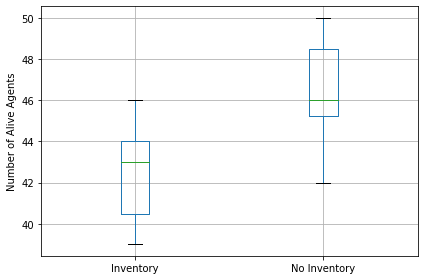

In [89]:
invvv_[['less_i', 'less_ni']].boxplot()
plt.xticks([1, 2],['Inventory', 'No Inventory'])
plt.ylabel('Number of Alive Agents')
plt.tight_layout()
plt.savefig('box-plot ini 4.png', format = 'png' )

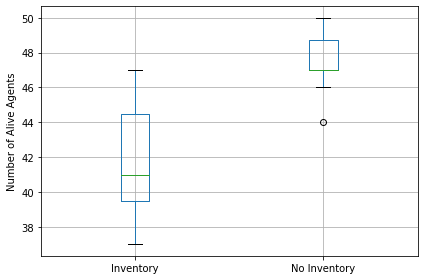

In [90]:
invvv_[['normal_i', 'normal_ni']].boxplot()
plt.xticks([1, 2],['Inventory', 'No Inventory'])
plt.ylabel('Number of Alive Agents')
plt.tight_layout()
plt.savefig('box-plot ini 9.png', format = 'png' )

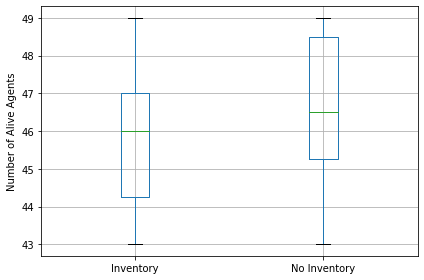

In [91]:
invvv_[['more_i', 'more_ni']].boxplot()
plt.xticks([1, 2],['Inventory', 'No Inventory'])
plt.ylabel('Number of Alive Agents')
plt.tight_layout()
plt.savefig('box-plot ini 16.png', format = 'png' )

In [98]:
all_.var()

Less           5.377778
Random 4       3.777778
Normal        11.511111
Random 9     149.344444
More           4.177778
Random 16     15.166667
dtype: float64

In [106]:
all_['Random 9']

0    27
1    21
2    40
3     3
4    14
5    32
6     2
7    19
8    26
9    29
Name: Random 9, dtype: int64